<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201/Lab/Group_Lab_Assignment_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraudulent Transactions Analysis and Prediction💳


Unauthorized use of an individual's account or payment information by a third party to make a purchase or transfer funds without the individual's knowledge constitutes a fraudulent transaction. The victim of a fraudulent transaction may lose money, personal property, or personal information. This theft can have severe consequences that extend beyond monetary losses. This study will examine the fraudulent transaction data of a financial institution and provide insight into the findings.

Using the dataset, we develop a model for predicting fraudulent transactions at a financial institution and then create an actionable plan based on the model's insights. The case data is available in **CSV** format, with 11 columns and 6362620 rows. The file size is **493.53 MB**. The purpose of this study is to comprehend how financial fraud operates and how it can be prevented in the future.


The dataset is found from kaggle datasets [Fraudulent Transactions Dataset](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data)

##Data Dictionary:
----------------
**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


##The tools and techniques used in this dataset are:
---

*   Pandas
*   Numpy
*   Scipy
*   Scikit-learn 
*   Matplotlib.pyplot 
*   Seaborn
*   Plotly
*   Statsmodels

##Group Lab Members:
----

<table width = 700>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>NURARISSA DAYANA BINTI MOHD SUKRI</th>
    <th>A20EC0120</th>
  </tr>
    <tr>
    <th>SAKINAH AL’IZZAH BINTI MOHD ASRI</th>
    <th>A20EC0142</th>
  </tr>
</table> 

## Downloading the Dataset

**TODO:**

1. Importing the basic libraries that will be use
2. Mount drive into google colab
3. Download the dataset and read csv file from Drive

1) Importing basic libraries 

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


2) Mount drive into google colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3) Download the dataset and read csv file from Drive


In [ ]:
fdata =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud.csv")
fdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


The summary of the data: 

In [ ]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data Preparation and Cleaning

**TODO:** 
1. Sampling the dataset
2. Print the summary of the dataset
3. Identify any missing values



1) Sampling the dataset to reduce the memory usage

There are an excessive number of records in the dataset: 6,362,620. It is a tedious and time-consuming procedure. Hence, a 10% sample will be taken from the dataset.

In [ ]:
# Calculate number of rows in file
n = sum(1 for line in open("/content/drive/MyDrive/Colab Notebooks/Fraud.csv"))-1 
# sample size of 10%
s = n//10  
# n+1 to compensate for header 
skip = sorted(rd.sample(range(1, n+1), n-s))  
fdata_sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud.csv", skiprows=skip)
pd.set_option('display.max_columns', None)
fdata_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
1,1,PAYMENT,4206.84,C215078753,0.00,0.00,M1757317128,0.0,0.0,0,0
2,1,PAYMENT,7413.54,C1470868839,297689.58,290276.03,M1426725223,0.0,0.0,0,0
3,1,PAYMENT,1684.81,C1481594086,297.00,0.00,M1569435561,0.0,0.0,0,0
4,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.0,0.0,0,0


In [ ]:
fdata_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


After the sampling, the memory usage decrease 90% from 534.0+ MB to 53.4+ MB.

2) Print the summary of the dataset

The sample dataset has 11 columns and 636262 rows. We will see the summary of this data:

In [ ]:
fdata_sample.shape

(636262, 11)

In [ ]:
fdata_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.00000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,243.63513,1.797108e+05,8.326029e+05,8.536925e+05,1.094277e+06,1.218340e+06,0.001312,0.000002
std,142.74376,5.995069e+05,2.886845e+06,2.922641e+06,3.346016e+06,3.618352e+06,0.036203,0.001254
min,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.00000,1.336416e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.00000,7.494031e+04,1.416450e+04,0.000000e+00,1.311315e+05,2.138017e+05,0.000000,0.000000
75%,335.00000,2.087716e+05,1.072180e+05,1.432137e+05,9.367128e+05,1.104866e+06,0.000000,0.000000
max,743.00000,6.096528e+07,4.731626e+07,3.816670e+07,3.249151e+08,3.555534e+08,1.000000,1.000000


3) Identify any missing values

In [ ]:
total_null = fdata_sample.isnull().sum()[fdata_sample.isnull().sum() == 0].sort_values(ascending = False)
percent = pd.Series(round(total_null/len(fdata_sample)*100,2))
pd.concat([total_null, percent], axis=1, keys=['Total Null', 'Percentage'])

,Total Null,Percentage
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


There is no missing value in the dataset. Next, the rows and columns are checked for whitespaces and duplicates.

In [ ]:
duplicate_rows_data = fdata_sample[fdata_sample.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 11)


There is no duplicated row found.

In [ ]:
fdata_sample.duplicated().sum()

0

## Exploratory Analysis and Visualization

**1** - [Boxplot of Amount](#scrollTo=3Pwb6QFhRlm4)

**2** - [Histogram of Amount](#scrollTo=cc-h_aGlp4_M) 

**3** - [Transaction Type Count](#scrollTo=Fv4NPHasVJJ7), [Bar Chart of Transaction Type](#scrollTo=V7boG4SwIlZg) 

**4** - [Merchant Count](#scrollTo=Dn_AW-5uVJJ7), [Multi-Collinearity](#scrollTo=rN1bUu8RVJJ7) 

**5** - [Correlation Heatmap](#scrollTo=nt_CVhi-VJJ8)




---



**Boxplot of Amount** - A boxplot depicts the distribution of a numeric variable across one or more groups. It enables quick access to the median, quartiles, and outliers. Using the amount attribute, we observed that the column contains outliers. The minimum, maximum, and median values are also closer together, and the difference between the quartiles is not particularly large. 

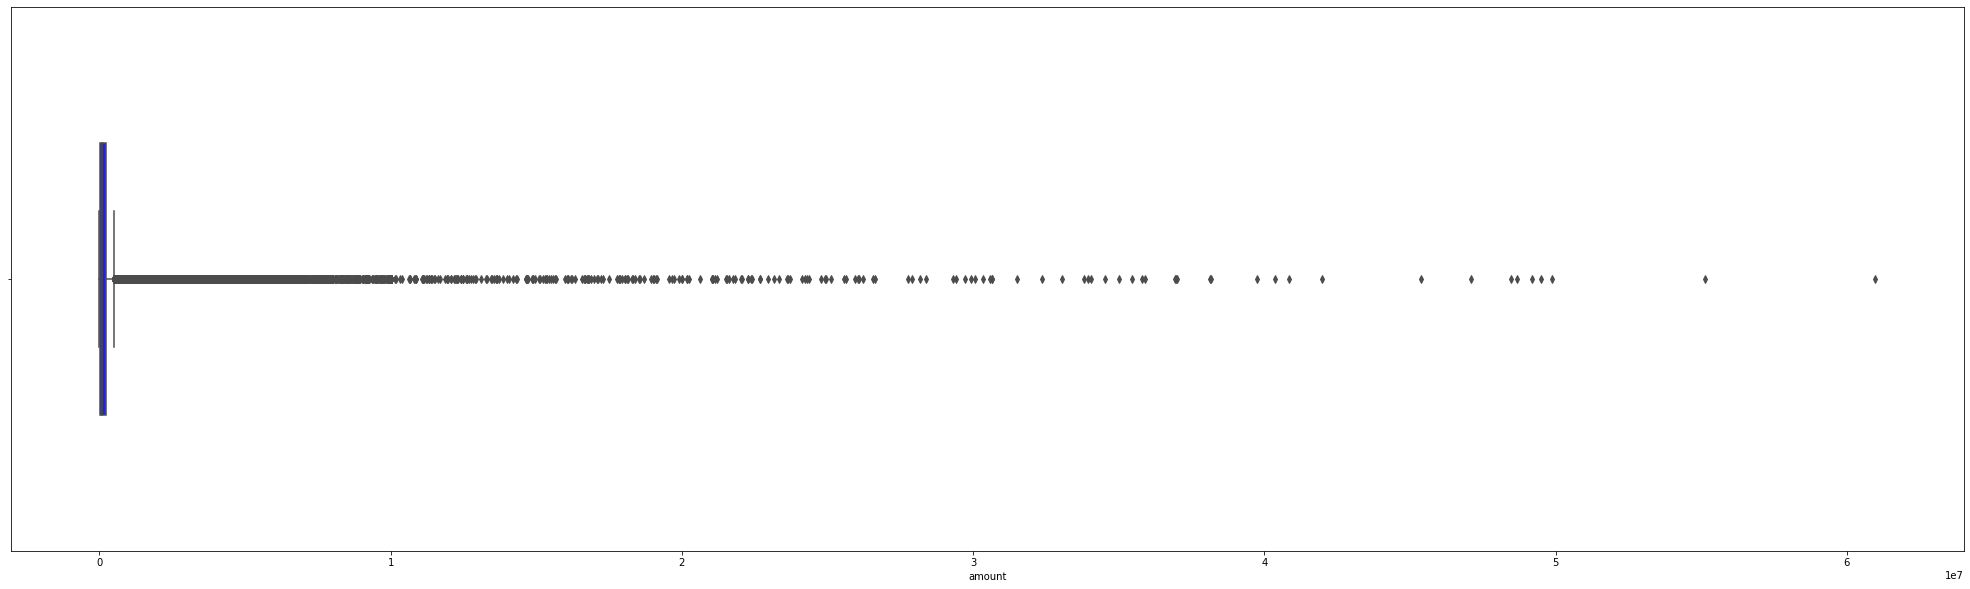

In [ ]:
plt.figure(figsize=(35,10))
sns.boxplot(x=fdata_sample["amount"], color='Blue', width=0.5)



---



**Histogram of Amount** - More than 95% of the transactions in the dataset have a value between 1 and 600,000, with the rest reaching extremely high values, the highest of which is greater than 10,000,000, indicating a highly skewed distribution to the right. This imbalance shows that a relatively small amount of people are responsible for large transactions, while the majority of users have low levels of spending.

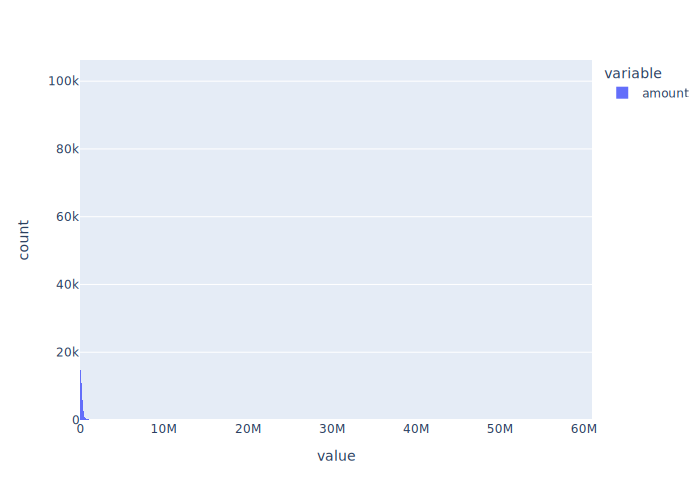

In [ ]:
df = fdata_sample['amount']
fig = px.histogram(df)
fig.show('svg', engine='kaleido')



---



**Transaction Type Count** - The percentage of legitimate transactions is 99.8688 percent, while the percentage of fraudulent transactions is 0.1312 percent, demonstrating that this is a highly unbalanced set of data.

In [ ]:
legit = len(fdata_sample[fdata_sample.isFraud == 0])
fraud = len(fdata_sample[fdata_sample.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f}%".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f}%".format(fraud_percent))

Number of Legit transactions:  635427
Number of Fraud transactions:  835
Percentage of Legit transactions: 99.8688%
Percentage of Fraud transactions: 0.1312%


([<matplotlib.axis.YTick at 0x7fb4d23db250>,
 [Text(0, 0, 'Legit'), Text(0, 0, 'Fraud')])

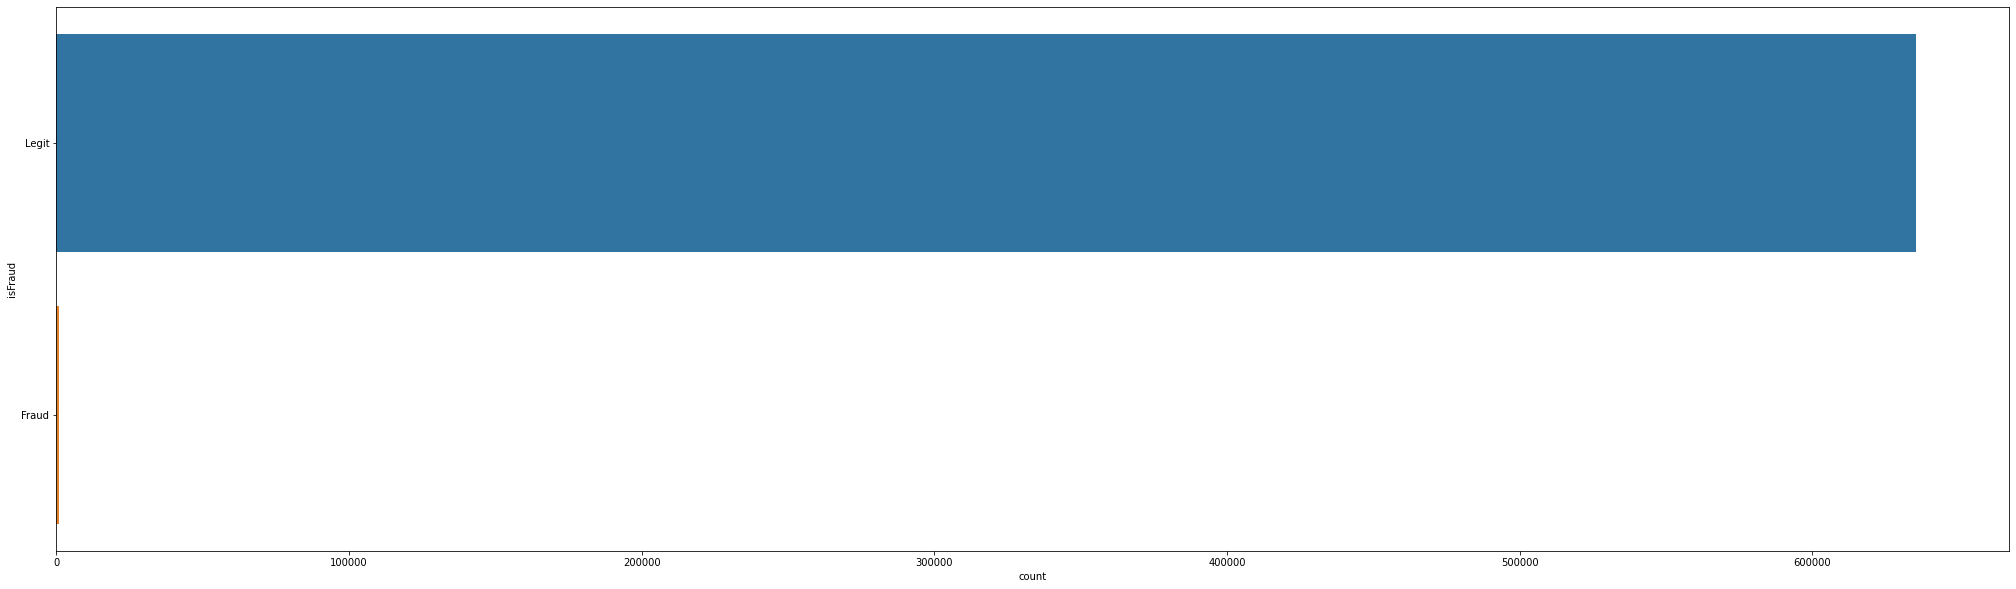

In [ ]:
fraud = fdata_sample['isFraud']
plt.figure(figsize=(35,10))
sns.countplot(y = fraud)
labels = ['Legit','Fraud']
plt.yticks(range(2), labels)



---



**Bar Chart of Transaction Type** - The bar chart shows that CASH_OUT is the highest transaction and DEBIT is the lowest. 

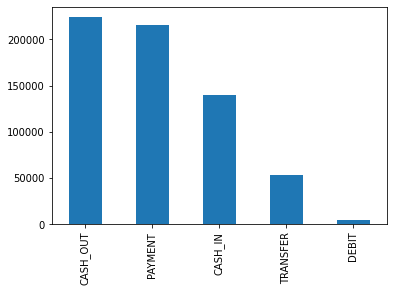

In [ ]:
fdata_sample['type'].value_counts().plot(kind = 'bar')



---



**Merchant Count** - Merchant has a total of 215,272 transactions, which account for 33.83 percent of all receipts. There is no balance information for customers whose names begin with M (Merchants).

In [ ]:
m = fdata_sample[fdata_sample['nameDest'].str.contains('M')]
total = fdata_sample['nameDest'].count()
m_count = m['nameDest'].count()
m_percentage = (m_count/total)*100

print('Number of Merchant: ', m_count)
print('Percentage of Merchant: {:.2f}%'.format(m_percentage))

m.head()

Number of Merchant:  215272
Percentage of Merchant: 33.83%


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
1,1,PAYMENT,4206.84,C215078753,0.00,0.00,M1757317128,0.0,0.0,0,0
2,1,PAYMENT,7413.54,C1470868839,297689.58,290276.03,M1426725223,0.0,0.0,0,0
3,1,PAYMENT,1684.81,C1481594086,297.00,0.00,M1569435561,0.0,0.0,0,0
5,1,PAYMENT,2252.44,C104716441,1627.00,0.00,M1506951181,0.0,0.0,0,0




---



**Multi-Collinearity** - OldbalanceOrg and newbalanceOrig have a high VIF, indicating that they are highly correlated. The same is true for both oldbalanceDest and newbalanceDest. Thus, we can combine these collinear attribute pairs and eliminate the individual attributes. By combining the collinear attribute pairs, we can reduce the dimensionality of the dataset, making it more manageable and easier to understand.

In [ ]:
#get numeric data from dataset, exclude the columns with Object data types
nd=pd.DataFrame({"step":fdata_sample.step,
                      "amount":fdata_sample.amount,
                      "oldbalanceOrg":fdata_sample.oldbalanceOrg,
                      "newbalanceOrig":fdata_sample.newbalanceOrig,
                      "oldbalanceDest":fdata_sample.oldbalanceDest,
                      "newbalanceDest":fdata_sample.newbalanceDest,
                      "isFraud":fdata_sample.isFraud,
                      "isFlaggedFraud":fdata_sample.isFlaggedFraud})

vif = pd.DataFrame()
vif["Feature"] = nd.columns
vif["VIF"] = [variance_inflation_factor(nd.values, i) for i in range(len(nd.columns))]

vif

,Feature,VIF
0,step,1.193543
1,amount,4.287293
2,oldbalanceOrg,557.609595
3,newbalanceOrig,560.078753
4,oldbalanceDest,74.796633
5,newbalanceDest,87.190271
6,isFraud,1.187764
7,isFlaggedFraud,1.001955


In [ ]:
#Combine the highly correlated columns together as one by substracting the new balances with old balances
nd['balanceOrig'] = nd.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
nd['balanceDest'] = nd.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

#Drop the unnecessary columns
nd = nd.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)

vif = pd.DataFrame()
vif["Feature"] = nd.columns
vif["VIF"] = [variance_inflation_factor(nd.values, i) for i in range(len(nd.columns))]

vif

,Feature,VIF
0,amount,3.803496
1,isFraud,1.175162
2,isFlaggedFraud,1.001872
3,balanceOrig,1.208055
4,balanceDest,3.858167




---



**Correlation Heatmap** - Using the previously determined VIF values, we must use the correlation heatmap to determine whether there are any two attributes that are highly correlated with isFraud. It can be seen that the attribute balanceOrig is linked to the attribute isFraud.

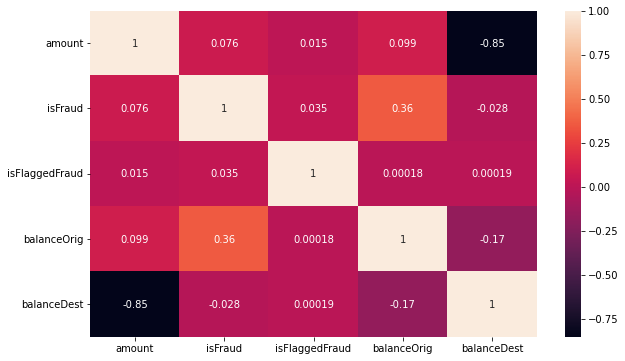

In [ ]:
corr=nd.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

## Asking and Answering Questions

[Q1: Who is the biggest spender among the customer?](#scrollTo=7Lor5rHMVJJ9&line=1&uniqifier=1)

[Q2: What is the range of amount likely to be a fraud?](#scrollTo=c_REVnrhVJJ-&line=1&uniqifier=1)

[Q3: Which type of transaction has many fraud cases?](#scrollTo=ya3o0SurVJJ-&line=1&uniqifier=1)

[Q4: How frequent are fraud cases?](#scrollTo=p4CcVO1TVJJ-&line=1&uniqifier=1)

[Q5: Predict the fraud cases based on the sample.](#scrollTo=uFuZBqX1VJJ_&line=1&uniqifier=1)

#### **Q1: Who is the biggest spender among the customer?**

In [ ]:
customer = fdata_sample.groupby('nameOrig')['amount'].sum()
BigSpend = customer.sort_values(ascending=False)
BigSpend

nameOrig
C453740720     60965275.64
C1680772125    55129569.83
C1260344462    49866234.71
C253892701     49507088.19
C831435828     49203983.59
                  ...     
C938188576            0.10
C1294472700           0.00
C10965156             0.00
C1461113533           0.00
C1997645312           0.00
Name: amount, Length: 636180, dtype: float64

**Answer:** The biggest spender is customer C453740720 with a total amount 60965275.64

>The library function description:
*   Pandas: groupby nameOrig, sum amount, sort values

#### **Q2: What is the range of amount likely to be a fraud?**

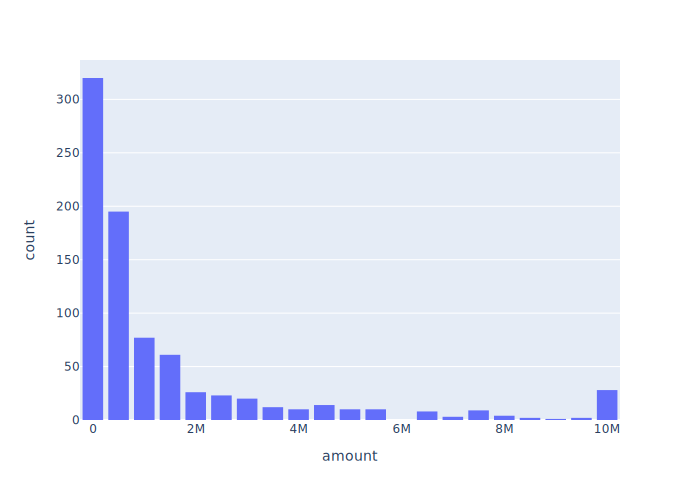

In [ ]:
#Create dataframe with fraud
df_fraud = fdata_sample[fdata_sample.isFraud == 1]

#Plot histograms of the amounts in fraud data 
f=px.histogram(df_fraud.amount, x='amount')
f.update_layout(bargap=0.2)
f.show('svg', engine='kaleido')

**Answer:** The amount is likely to be fraud in between 249k to 250k

>The library function description:
*   Pandas: create dataframe
*   Plotly: plot histogram

#### **Q3: Which type of transactions has many fraud cases?**

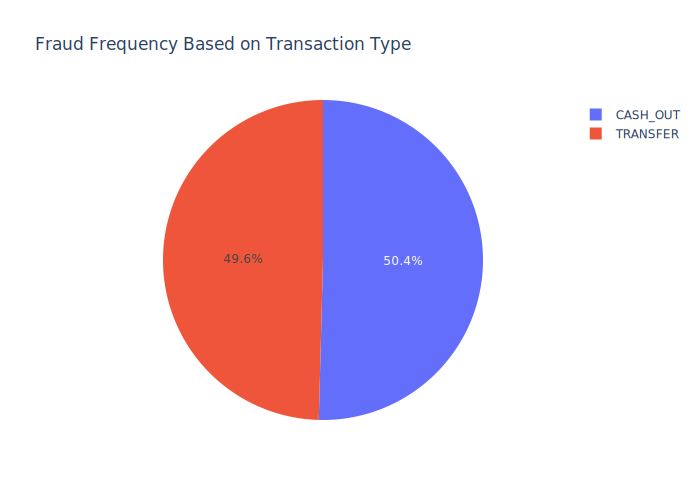

In [ ]:
df = fdata_sample[fdata_sample.isFraud == 1]

fig = px.pie(df, values='isFraud', names='type', title='Fraud Frequency Based on Transaction Type', color_discrete_map=px.colors.sequential.RdBu)
fig.show('svg', engine='kaleido')

**Answer:** Both CASH_OUT and TRANSFER are the most likely to have fraud cases.

>The library function description:
*   Plotly: Pie Chart

#### **Q4: How frequent are fraud cases?**

([<matplotlib.axis.YTick at 0x7fb4cd13c940>,
 [Text(0, 0, 'Legit'), Text(0, 0, 'Fraud')])

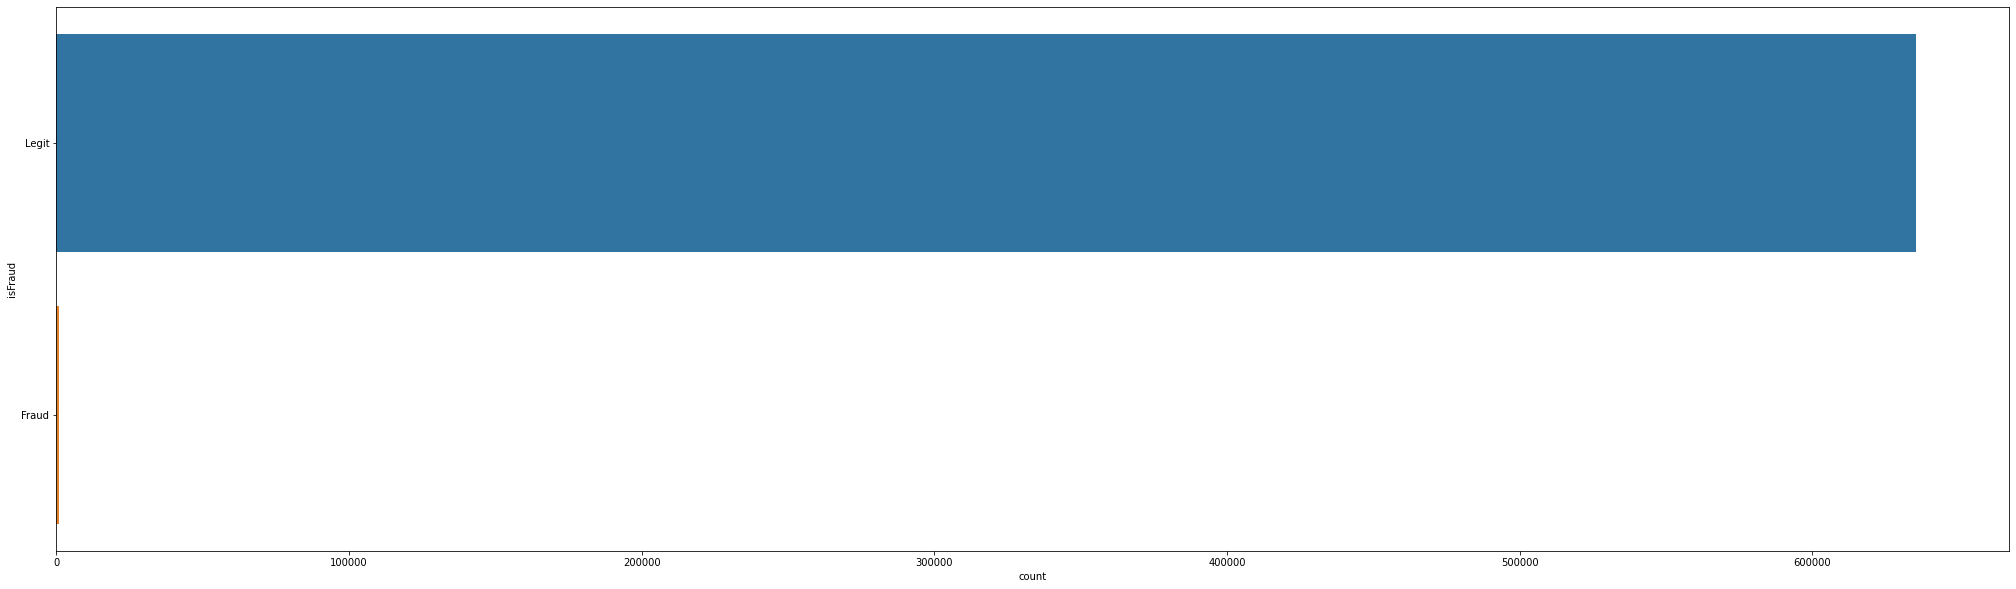

In [ ]:
fraud = fdata_sample['isFraud']
plt.figure(figsize=(35,10))
sns.countplot(y = fraud)
labels = ['Legit','Fraud']
plt.yticks(range(2), labels)

**Answer:** The frequency of fraud cases in this sample is 816 cases.
>The library function description:
*   Matplotlib: Count plot

#### **Q5: Predict the fraud cases based on the sample.**

In [ ]:
# Perform Scaling
scaler = StandardScaler()
nd["NormalizedAmount"] = scaler.fit_transform(nd["amount"].values.reshape(-1, 1))
nd.drop(["amount"], inplace= True, axis= 1)

Y = nd["isFraud"]
X = nd.drop(["isFraud"], axis= 1)

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (445383, 4)
Shape of X_test:  (190879, 4)


In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[190552     99]
 [    94    134]]


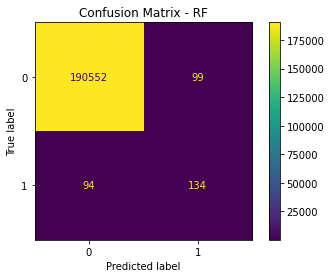

In [ ]:
# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190651
           1       0.58      0.59      0.58       228

    accuracy                           1.00    190879
   macro avg       0.79      0.79      0.79    190879
weighted avg       1.00      1.00      1.00    190879



**Answer:** From the report above, true positive shows that the amount of correct predictions is 190552. There are only 134 true negative amount. This demonstrates a high level of precision in prediction.

>The library function description:
*   scikit-learn: Random Forest Prediction, Confusion Matrix

## Inferences and Conclusion

**Inferences**- According to the study, wherein the boxplot represents the distribution of the amount attribute, we find that the column features outliers. There is less of a gap between the minimum and maximum and the median, and the quartiles are not too far apart. The majority of the transactions in the dataset have a value between 1 and 600,000, with the remainder reaching extremely high values, the highest of which is greater than 10,000,000, indicating a highly skewed distribution to the right. This discrepancy demonstrates that a minority of users are responsible for the majority of transactions' volume, while the vast majority of users have relatively low transaction volumes. It is also clear that the data is extremely right skewed, with the percentage of legitimate transactions being 99.8688 percent and the percentage of fraudulent transactions being only 0.1312 percent. 

CASH OUT is the highest transaction and DEBIT is the lowest, as shown by the bar graph. After removing all transactions to Merchant, we were left with 215,272, or 33.83% of total revenue. OldbalanceOrg and NewbalanceOrig have a high VIF, which indicates a strong correlation. Similarly, both oldbalanceDest and newbalanceDest are equivalent. Therefore, the dimensionality of the dataset is reduced by combining attribute pairs that are highly collinear. The correlation heatmap is then used to see if there are any pairs of attributes that are significantly correlated with isFraud, given the VIF values already established. The relationship between balanceOrig and isFraud can be seen.

**Conclusion**- According to the analysis, cash out and transfer transactions are the most vulnerable to fraud. This is due to both types of transactions are easier to obtain and difficult to track. To avoid fraud, never send credit card numbers, Social Security numbers, or other personal information via email. Private information should be destroyed. Tear up or shred credit card statements, ATM, credit or debit card receipts, bank deposit receipts, loan solicitations, and other documents containing private financial information.

Looking at the histogram, the amount most likely to be fraudulent is between 249K and 250K. This demonstrates that fraud is detected early on before it becomes costly. By learning wheter or not the transactions we made is fraud and how the fraudulent can be in large amounts of money, we can keep careful to reduce the fraudulent transactions.


## References and Future Work

**References**
1. https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data
2. https://plotly.com/graphing-libraries/
3. https://www.python-graph-gallery.com/

**Future Work:**

1. Creating an interactive visualization tool to allow users to explore the data and gain insights into fraud transaction.

2. Creating a prediction model to better forecast fraud transaction value and reduce the fraudulent transactions.